In [1]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [8]:
data_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/dataset/avg_satisfaction_raw_0-999.csv', encoding='ISO-8859-1')

In [52]:
list_satisfaction = list(data_df['satisfy_composite'])
list_tag = list(data_df['postIndex'])
list_post = list(data_df['postContent'])
list_comment = list(data_df['commentContent'])

In [22]:
list_content = []
for p, c in zip(list_post, list_comment):
    list_content.append(p+' '+c)

# Doc2Vec

In [87]:
def train_doc2vec(data, tag, model_name):
    tagged_data = [TaggedDocument(words=word_tokenize(term.lower()), tags=[tag[i]]) for i, term in enumerate(data)]
    
    max_epochs = 500
    vec_size = 100
    alpha = 0.025

    model = Doc2Vec(vector_size=vec_size,
                   alpha=alpha,
                   min_alpha=0.00025,
                   min_count=1,
                   dm=1)

    model.build_vocab(tagged_data)
    
    for epoch in range(max_epochs):
        if epoch % 100 == 0:
            print('iteration {0}'.format(epoch))
    
        model.train(tagged_data,
                   total_examples=model.corpus_count,
                   epochs=model.epochs)
    
        model.alpha -= 0.0002
        model.min_alpha = model.alpha
    
    model.save(f"{model_name}")
    
    embeddings = []
    for i in range(1000):
        embeddings.append(list(model.dv[i]))
        
    tsne = TSNE(random_state = 42)
    data_tsne = tsne.fit_transform(embeddings)
    
    x_for_tsne = []
    y_for_tsne = []

    for xy in data_tsne:
        x_for_tsne.append(xy[0])
        y_for_tsne.append(xy[1])
        
    return x_for_tsne, y_for_tsne

In [89]:
def t_sne(x, y, score, xlabel, ylabel):
    size = list(map(lambda x:x*70, score))
    
    minsize = min(size)
    maxsize = max(size)

    tsne_df = pd.DataFrame({'x': x, 'y': y, 'color': score, 'size': size})

    fig, ax = plt.subplots()

    # set before set_style
    sns.set(rc={'figure.figsize':(30,25)})
    sns.set_style("white")

    ax = sns.scatterplot(x = 'x', y = 'y', hue="color", size = "size", data=tsne_df, palette='cool', 
                        sizes=(minsize, maxsize), alpha=0.65, edgecolor="black", linewidth=1, legend = False)
    
    for i, s in enumerate(score):
        ax.annotate(round(s, 2), (x[i], y[i]+0.15), fontsize=10)

    ax.set(xlabel=None, ylabel=None)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, 
                            norm=plt.Normalize(vmin=min(score), vmax=max(score)))

    cbar = fig.colorbar(sm)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400


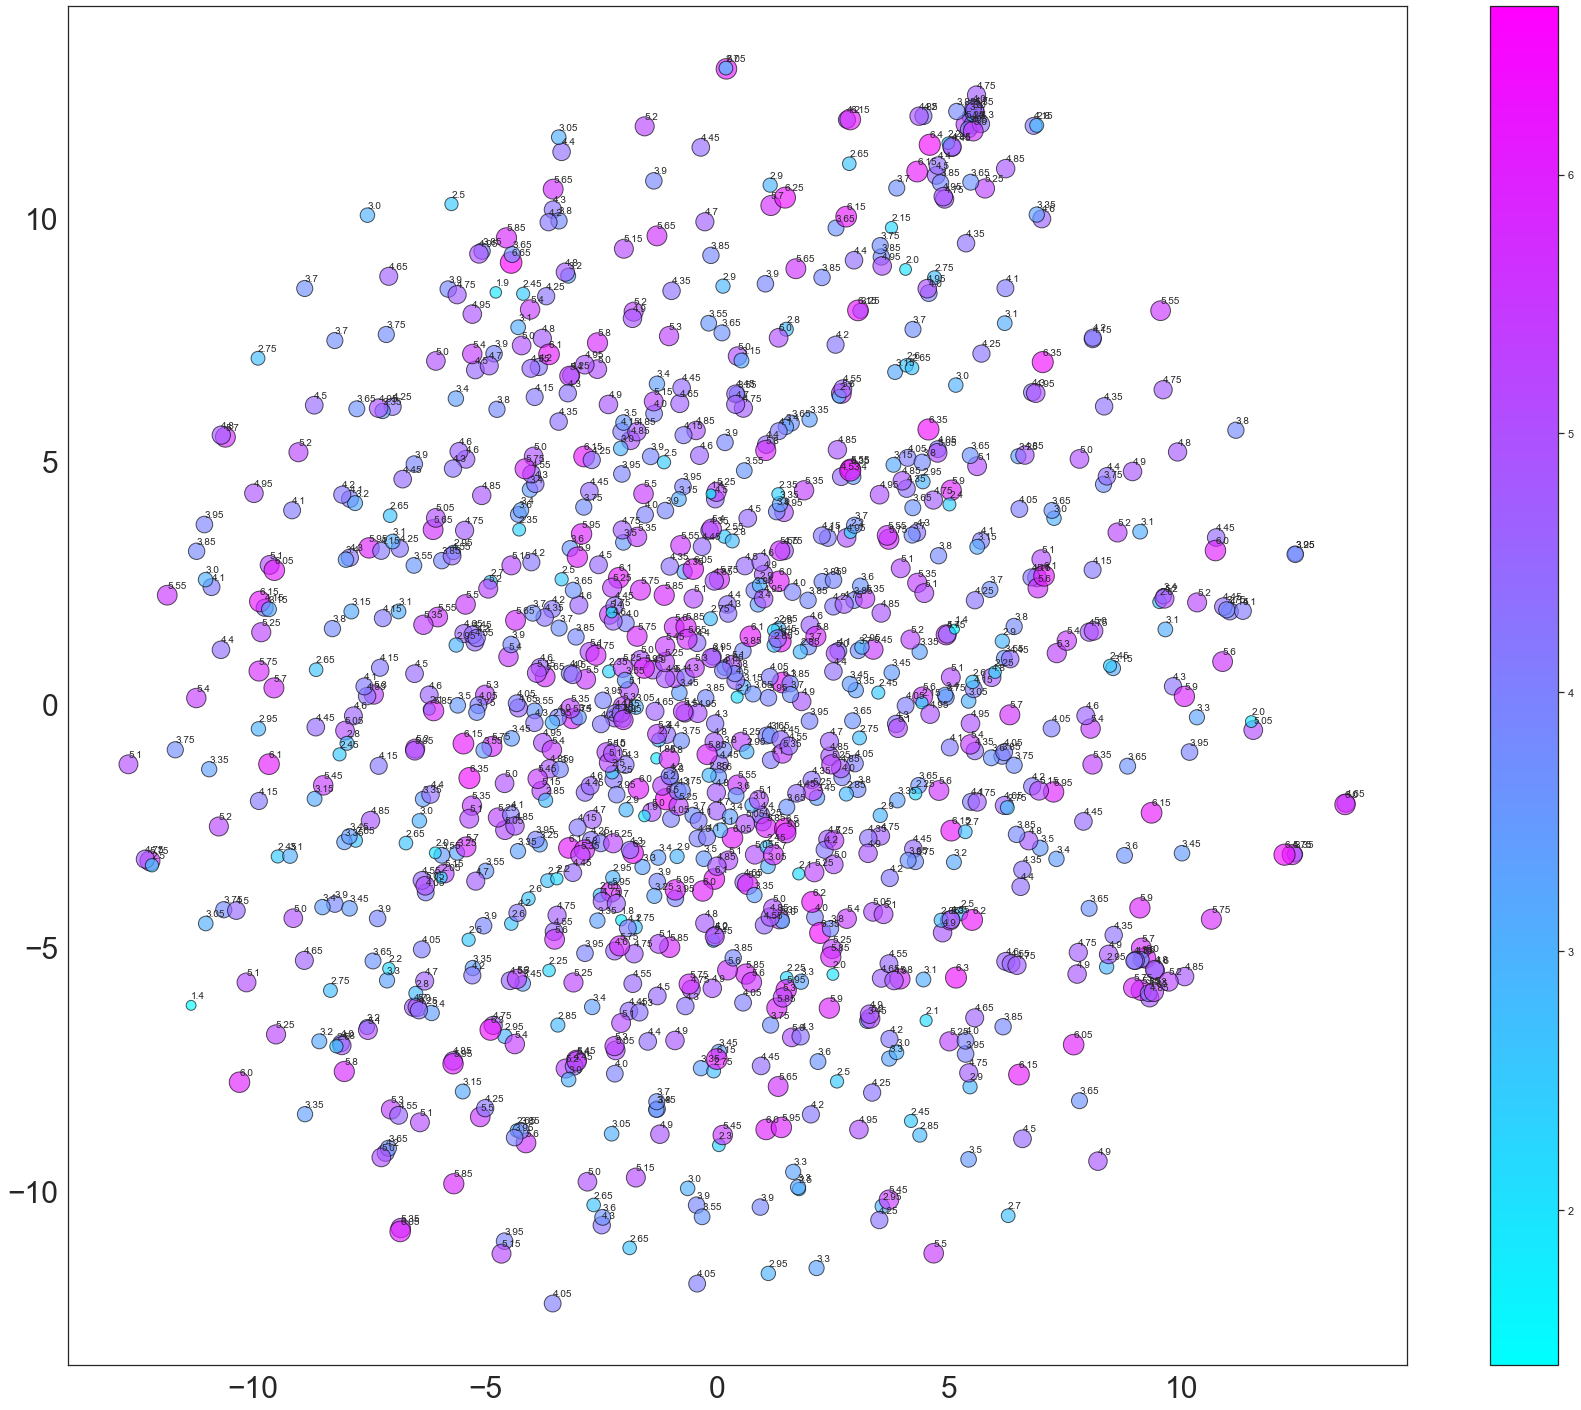

In [91]:
x_for_tsne, y_for_tsne = train_doc2vec(list_content, list_tag, "post_comment.model")
t_sne(x_for_tsne, y_for_tsne, list_satisfaction, 'x', 'y')

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400


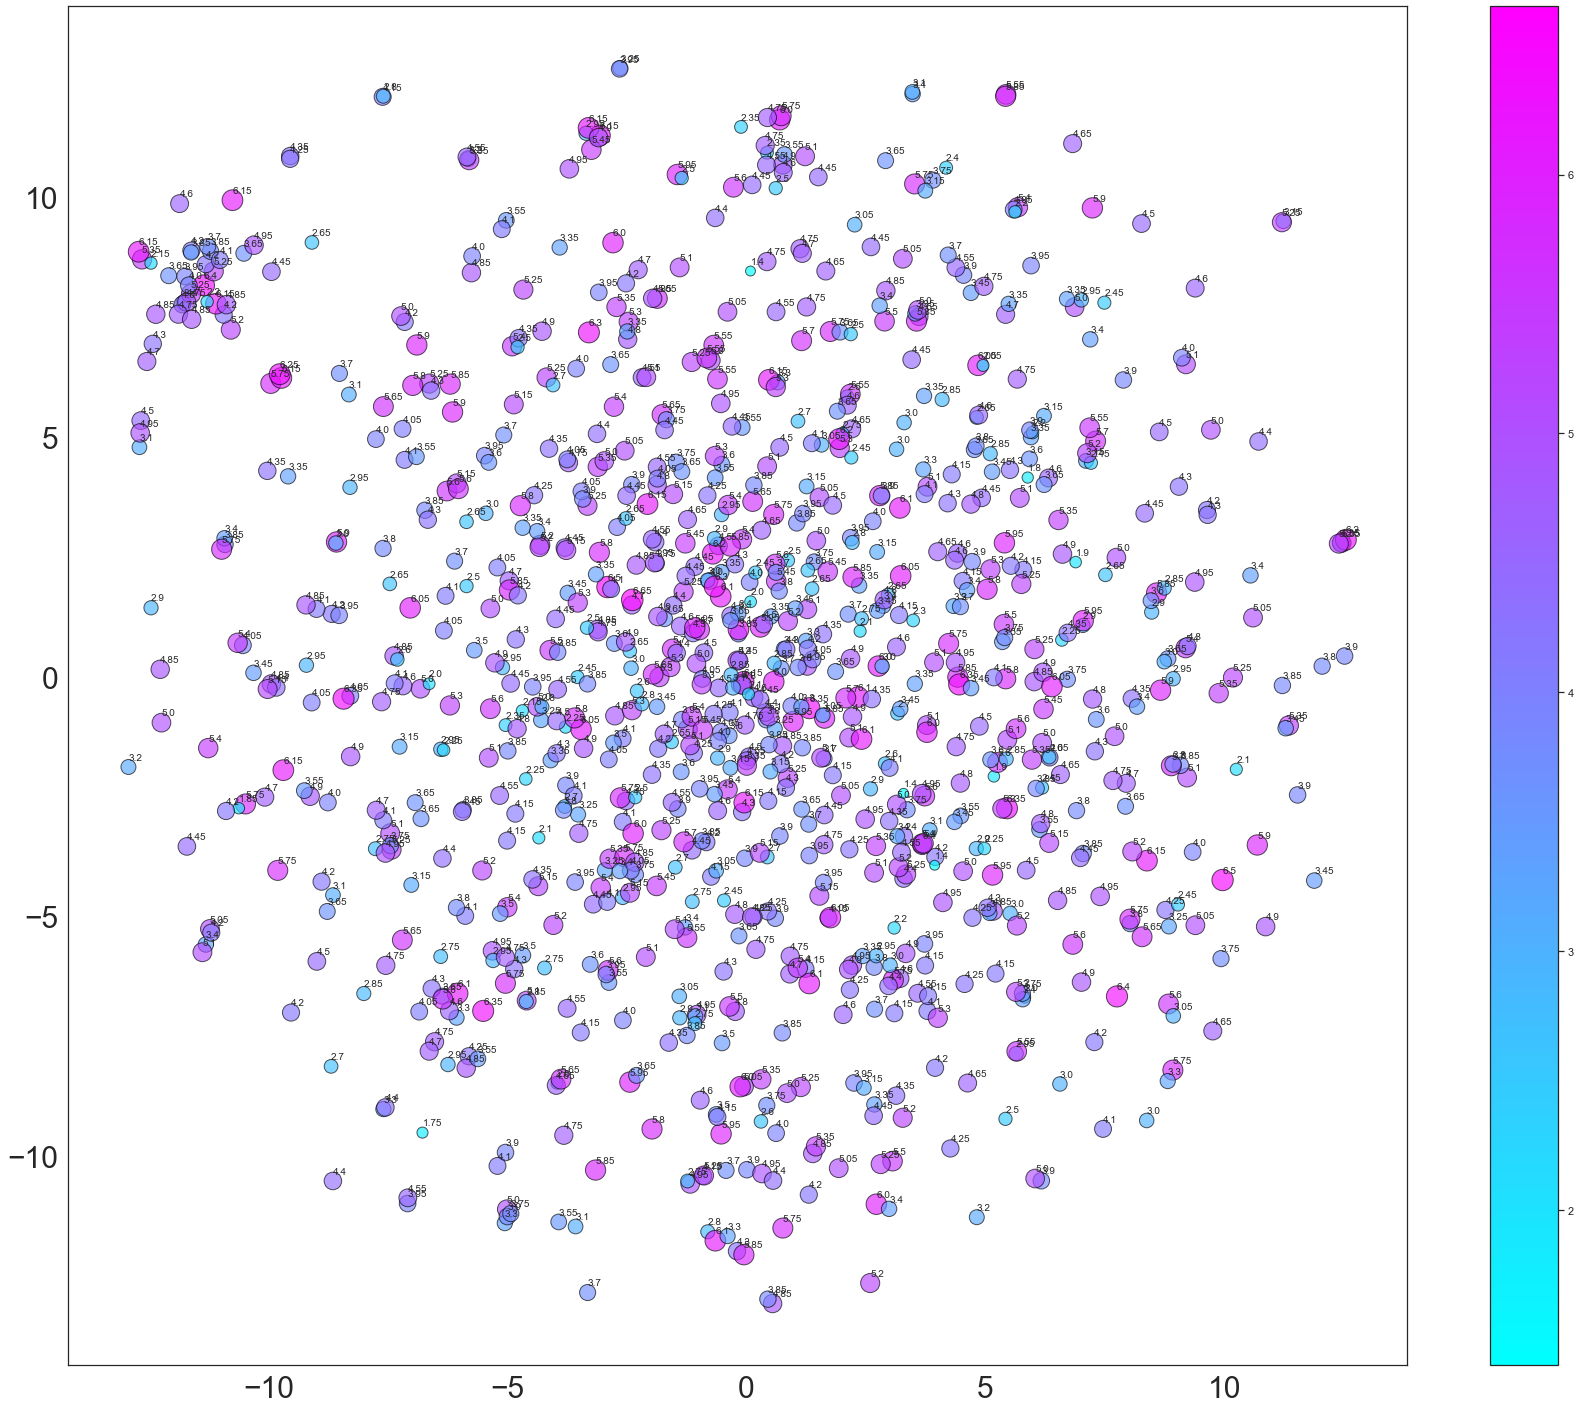

In [92]:
x_for_tsne, y_for_tsne = train_doc2vec(list_post, list_tag, "post.model")
t_sne(x_for_tsne, y_for_tsne, list_satisfaction, 'x', 'y')

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400


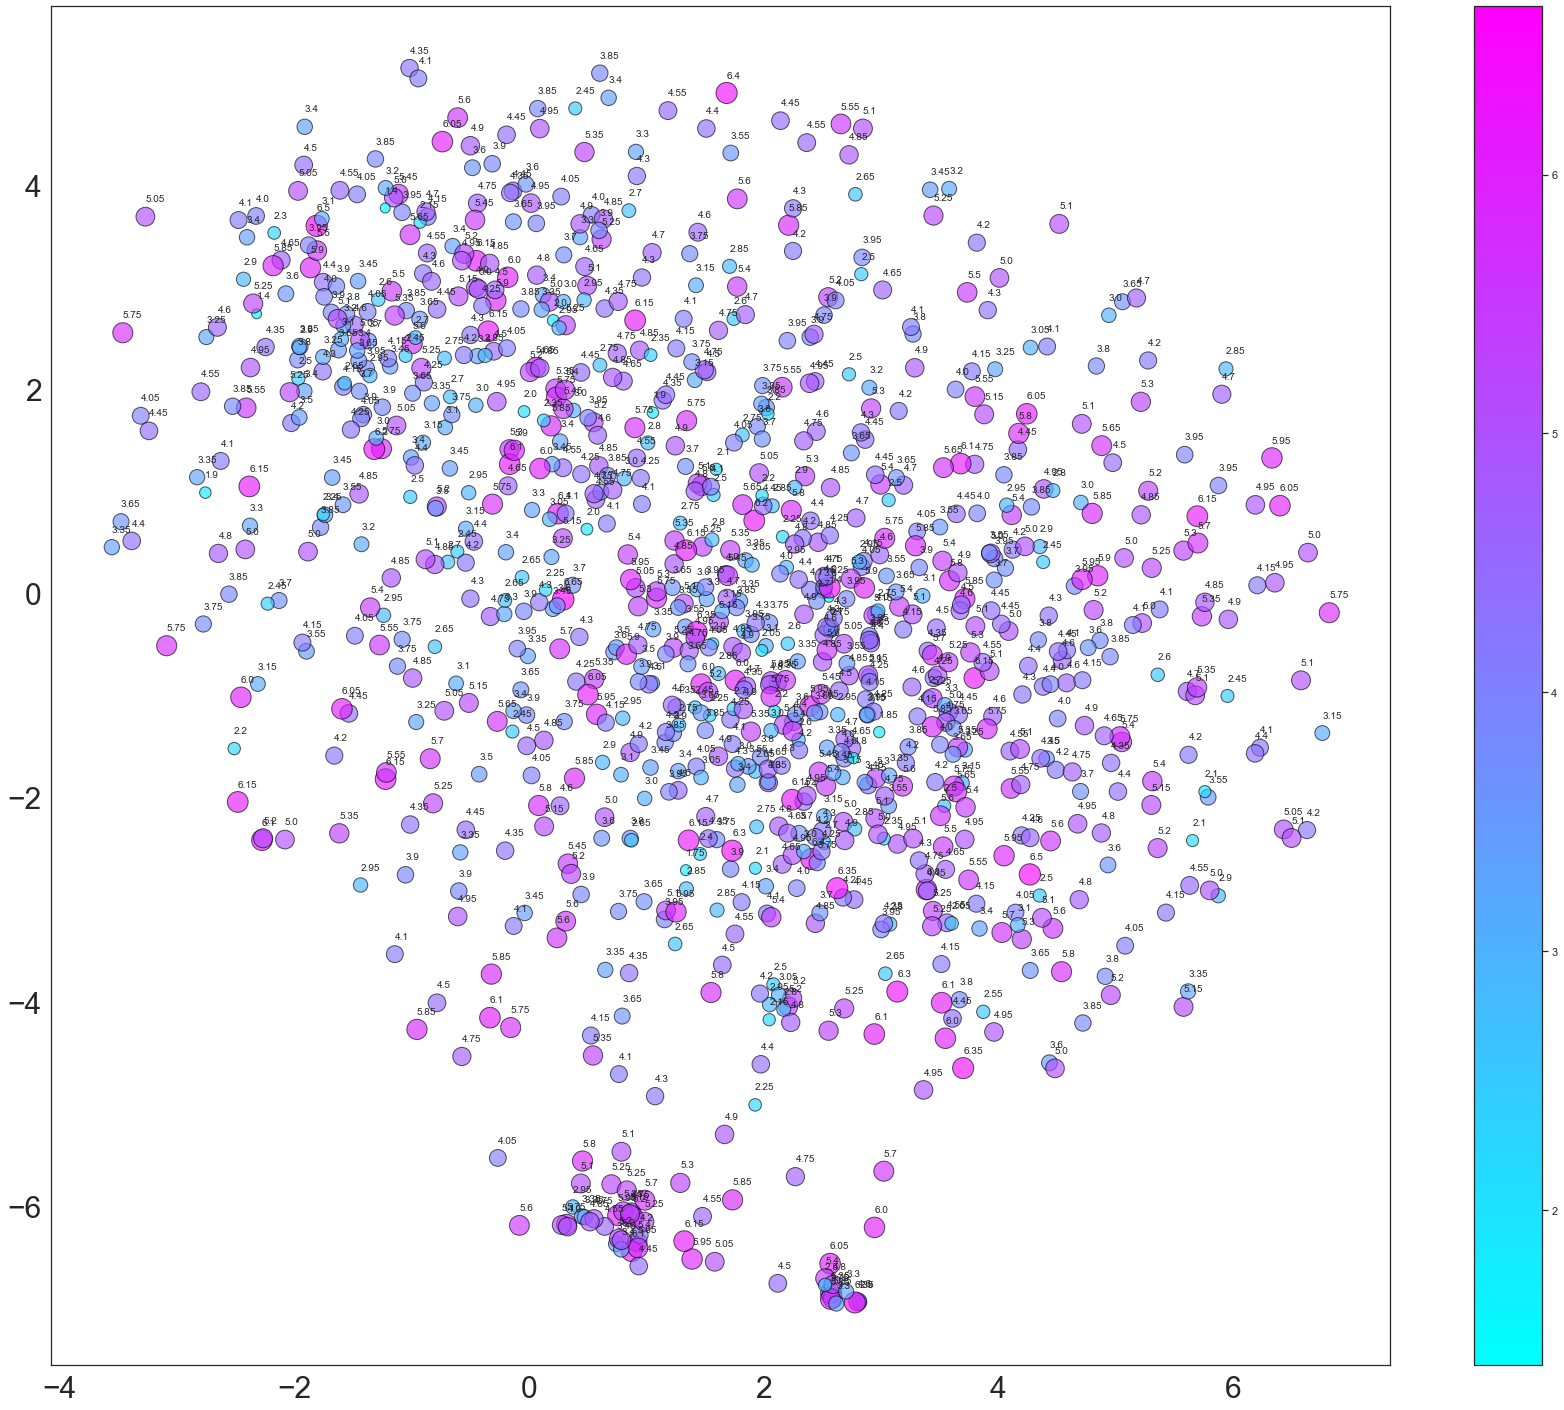

In [93]:
x_for_tsne, y_for_tsne = train_doc2vec(list_comment, list_tag, "comment.model")
t_sne(x_for_tsne, y_for_tsne, list_satisfaction, 'x', 'y')